Chequeo de valores nulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

In [2]:
games=pd.read_parquet("ETL.GAMES.parquet")

In [3]:
games.isnull().sum() #devuelve la cantidad de valores nulos en cada columna del dataframe games.

genres          0
item_name       0
release_date    0
year            0
tags            0
specs           0
price           0
early_access    0
item_id         0
developer       0
dtype: int64

In [4]:
games.info() #muestra información general sobre el dataframe, incluyendo la cantidad de valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27131 entries, 0 to 27130
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        27131 non-null  object        
 1   item_name     27131 non-null  object        
 2   release_date  27131 non-null  datetime64[ns]
 3   year          27131 non-null  int32         
 4   tags          27131 non-null  object        
 5   specs         27131 non-null  object        
 6   price         27131 non-null  float64       
 7   early_access  27131 non-null  float64       
 8   item_id       27131 non-null  float64       
 9   developer     27131 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 2.0+ MB


In [5]:
games_len = len(games['item_id'].unique()) #con esto obtenemos la cantidad de juegos unicos
games_len

27131

Text(0, 0.5, 'Cantidad de valores nulos')

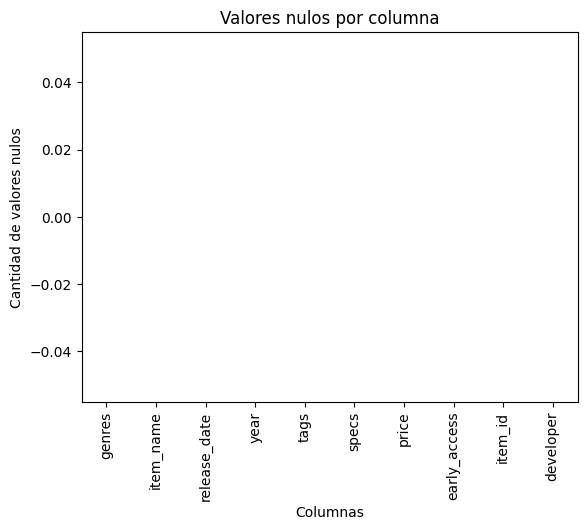

In [6]:
games.isnull().sum().plot(kind='bar')
plt.title('Valores nulos por columna') 
plt.xlabel('Columnas') 
plt.ylabel('Cantidad de valores nulos')

# crea un gráfico de barras que muestra la cantidad de valores nulos en cada columna del dataframe games.

Chequeo de valores duplicados

In [7]:
games

,genres,item_name,release_date,year,tags,specs,price,early_access,item_id,developer
0,Action,Lost Summoner Kitty,2018-01-04,2018,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,761140.0,Kotoshiro
1,Free to Play,Ironbound,2018-01-04,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL
2,Casual,Real Pool 3D - Poolians,2017-07-24,2017,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolians.com
3,Action,弹炸人2222,2017-12-07,2017,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,767400.0,彼岸领域
4,Action,Battle Royale Trainer,2018-01-04,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...,...,...
27126,Action,Kebab it Up!,2018-01-04,2018,"[Action, Indie, Casual, Violent, Adventure]","[Single-player, Steam Achievements, Steam Cloud]",1.99,0.0,745400.0,Bidoniera Games
27127,Casual,Colony On Mars,2018-01-04,2018,"[Strategy, Indie, Casual, Simulation]","[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
27128,Casual,LOGistICAL: South Africa,2018-01-04,2018,"[Strategy, Indie, Casual]","[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
27129,Indie,Russian Roads,2018-01-04,2018,"[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich


In [8]:
games.duplicated(['item_id']).sum() #devuelve la cantidad de filas duplicadas en el dataframe games.

np.int64(0)

Chequeo de valores faltantes

Tipos de datos

In [9]:
games.dtypes #muestra los tipos de datos de cada columna del dataframe df.

genres                  object
item_name               object
release_date    datetime64[ns]
year                     int32
tags                    object
specs                   object
price                  float64
early_access           float64
item_id                float64
developer               object
dtype: object

Text(0, 0.5, 'Cantidad de columnas')

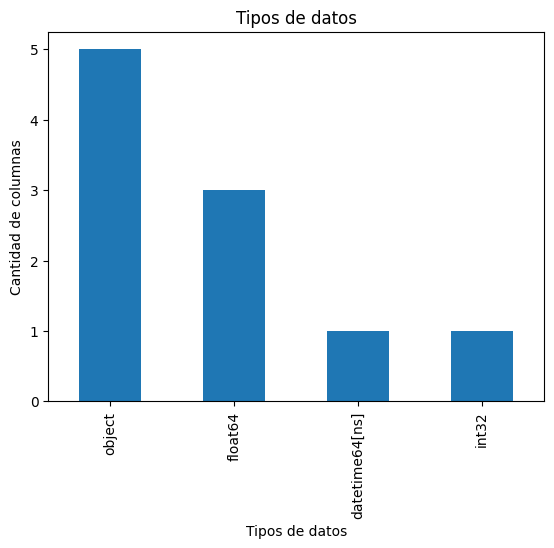

In [10]:
games.dtypes.value_counts().plot(kind='bar'); 
plt.title('Tipos de datos'); 
plt.xlabel('Tipos de datos'); plt.ylabel('Cantidad de columnas') #crea un gráfico de barras que muestra la cantidad de columnas por tipo de datos en el dataframe df.

# DESARROLLADOR

In [11]:
developer_desarrollos= games['developer'].value_counts() #obtenemos la cantidad de juegos lanzados en steam por desarrollador
developer_desarrollos

developer
Ubisoft - San Francisco                  1258
SmiteWorks USA, LLC                       812
Dovetail Games                            253
KOEI TECMO GAMES CO., LTD.                214
Paradox Development Studio                153
                                         ... 
Mark Healey                                 1
SyKoHPaTh                                   1
Patrick Hofmann                             1
DreamInCode B.V.,Squadron Interactive       1
ImageCode LLC.                              1
Name: count, Length: 10496, dtype: int64

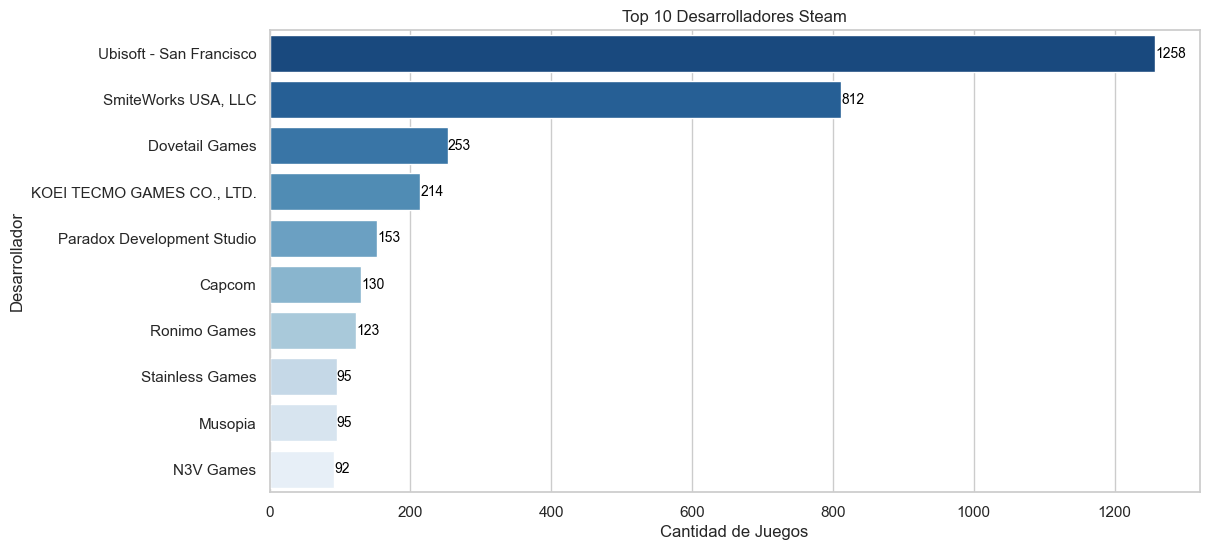

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

developer_data = developer_desarrollos[:10]
sns.barplot(x=developer_data.values, y=developer_data.index, palette="Blues_r")

plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores Steam')

# Se añaden los valores en las barras a través de una iteración
for i, v in enumerate(developer_data.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [13]:
games_for_year= games['year'].value_counts()
games_for_year

#Se mostrará un acumulativo de lanzamiento de videojuegos por año.

year
2017    8941
2016    6459
2015    4376
2014    2489
2013    1381
2012    1092
2011     521
2010     382
2009     301
2008     184
2007     144
2006     139
2005      88
2003      73
2018      68
2004      62
2001      55
1998      48
1999      42
1997      39
2002      39
1996      35
2000      34
1994      31
1995      30
1993      24
1992      13
1991      10
1990       8
1989       7
1988       5
1987       4
1984       2
1983       1
1986       1
2021       1
2019       1
1985       1
Name: count, dtype: int64

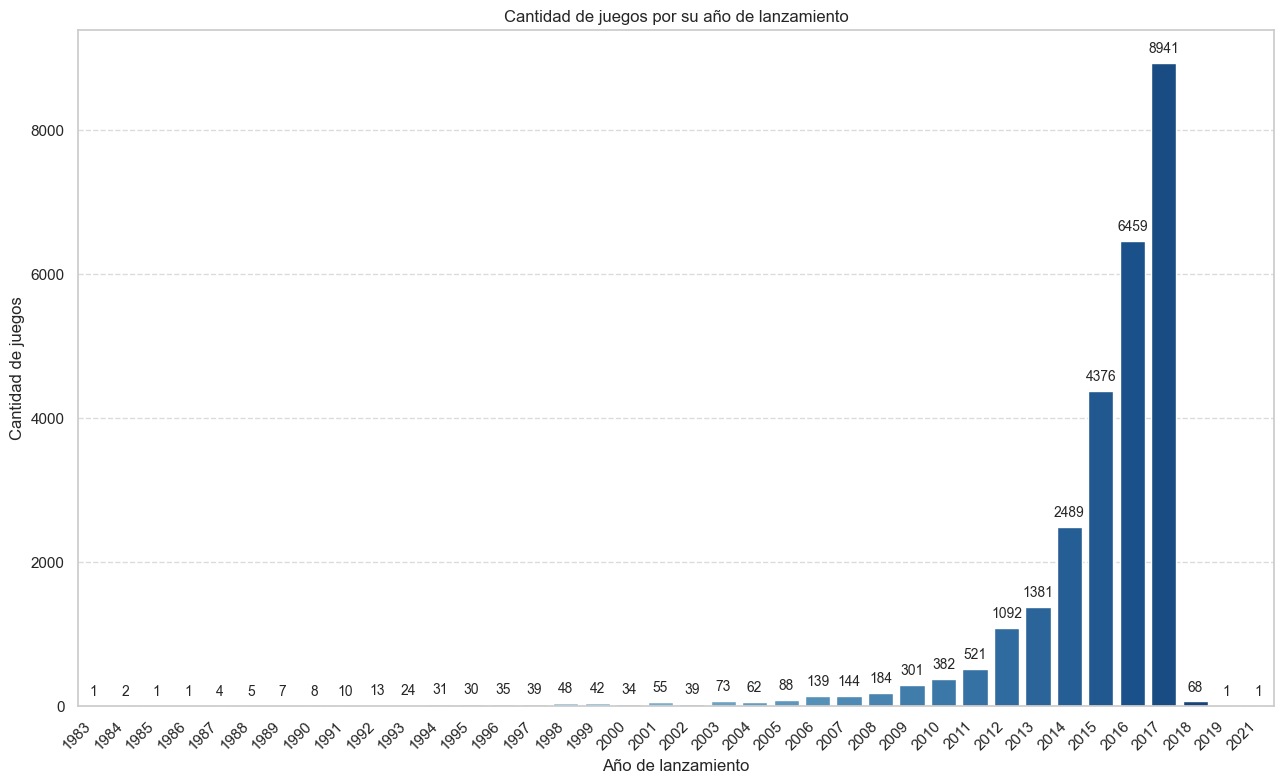

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(13, 8))

ax = sns.barplot(x=games_for_year.index, y=games_for_year.values, palette="Blues")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set(xlabel='Año de lanzamiento', ylabel='Cantidad de juegos',
       title='Cantidad de juegos por su año de lanzamiento')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#creamos un grafico de barras representativo del acumulativo de vídeojuegos por año

In [15]:
genres_quantity = games['genres'].value_counts() #contamos la cantidad de juegos por genero
genres_quantity

genres
Action                       10614
Casual                        4239
Adventure                     4107
Indie                         3147
Simulation                    1800
Strategy                      1089
RPG                            630
Free to Play                   476
Racing                         436
Design &amp; Illustration      283
Animation &amp; Modeling       120
Sports                          55
Utilities                       40
Massively Multiplayer           39
Audio Production                38
Education                        5
Video Production                 4
Early Access                     4
Web Publishing                   3
Photo Editing                    2
Name: count, dtype: int64

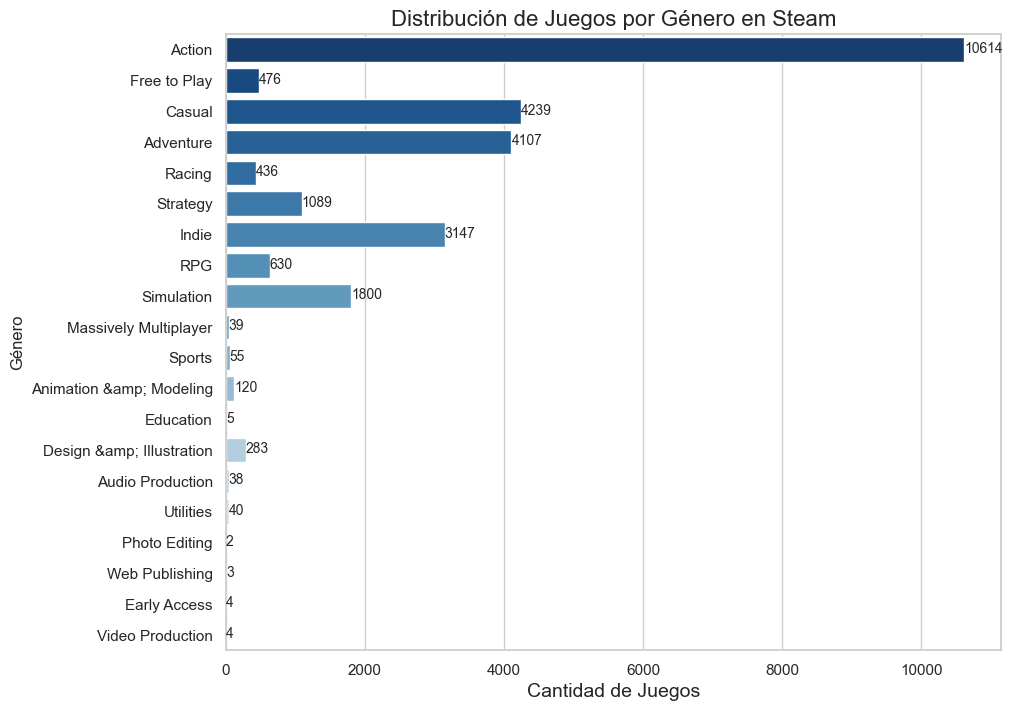

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=games, y='genres', orient='h', palette='Blues_r')

ax.set_title('Distribución de Juegos por Género en Steam', fontsize=16)
ax.set_xlabel('Cantidad de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 0.1, p.get_y() + 0.5), fontsize=10)

plt.show()

In [17]:
reviews=pd.read_parquet("ETL.REVIEWS.parquet")

In [18]:
reviews.info() #vemos la informacion de las columnas del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52758 entries, 0 to 52757
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    52758 non-null  object 
 1   item_id    52758 non-null  float64
 2   recommend  52758 non-null  bool   
 3   review     52758 non-null  object 
 4   item_name  52758 non-null  object 
dtypes: bool(1), float64(1), object(3)
memory usage: 1.7+ MB


In [19]:
reviews.isnull().sum() # vemos la cantidad de nulos 

user_id      0
item_id      0
recommend    0
review       0
item_name    0
dtype: int64

In [20]:
#Vemos la cantidad de usuarios de juegos de steam en la plataforma
user_quantity = len(reviews['user_id'].unique())
user_quantity

23065

In [22]:
#vemos la cantidad de recomendaciones hechas
recommend_quantity = reviews['recommend'].value_counts()
recommend_quantity

recommend
True     46333
False     6425
Name: count, dtype: int64

In [23]:
sentiment_analysis_quantity = reviews['sentiment_analysis'].value_counts()
sentiment_analysis_quantity

#vemos el conteo del analisis de sentimiento para cada caso

KeyError: 'sentiment_analysis'

Análisis estadístico de datos

In [ ]:
games.describe() # muestra estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) para cada columna numérica del dataframe df.

In [ ]:
media_columnas = games.mean() #calcula la media de cada columna numérica del dataframe df.

In [ ]:
df.median() : calcula la mediana de cada columna numérica del dataframe df.

In [ ]:
df.mode() : calcula la moda de cada columna numérica del dataframe df.

In [ ]:
df.std() : calcula la desviación estándar de cada columna numérica del dataframe df.

In [ ]:
df.var() : calcula la varianza de cada columna numérica del dataframe df.

In [ ]:
import matplotlib.pyplot as plt; df.describe().plot(kind='bar'); plt.title('Estadísticas descriptivas'); plt.xlabel('Columnas'); plt.ylabel('Valores') : crea un gráfico de barras que muestra las estadísticas descriptivas para cada columna numérica del dataframe df.

diagramas de torta

In [ ]:
import matplotlib.pyplot as plt; plt.pie(df['columna'].value_counts(), labels=df['columna'].unique(), autopct='%1.1f%%'); plt.title('Distribución de valores en columna'); plt.show() : crea un diagrama de torta que muestra la distribución de valores en una columna específica del dataframe df.

Histogramas

In [ ]:
import matplotlib.pyplot as plt; plt.hist(df['columna'], bins=10); plt.title('Histograma de columna'); plt.xlabel('Valores'); plt.ylabel('Frecuencia') : crea un histograma que muestra la distribución de valores en una columna específica del dataframe df.

Distribuciones

In [ ]:
import seaborn as sns; sns.distplot(df['columna']); plt.title('Distribución de columna'); plt.xlabel('Valores'); plt.ylabel('Frecuencia') : crea un gráfico de distribución que muestra la forma en que se distribuyen los valores en una columna específica del dataframe df.

Diagramas de bigotes

In [ ]:
import matplotlib.pyplot as plt; plt.boxplot(df['columna']); plt.title('Diagrama de bigotes de columna'); plt.xlabel('Valores'); plt.ylabel('Frecuencia') : crea un diagrama de bigotes que muestra la distribución de valores en una columna específica del dataframe df.

Análisis de correlaciones de dos variables

In [ ]:
df['columna1'].corr(df['columna2']) : calcula la correlación entre dos columnas específicas del dataframe df.

In [ ]:
import matplotlib.pyplot as plt; plt.scatter(df['columna1'], df['columna2']); plt.title('Correlación entre columna1 y columna2'); plt.xlabel('Columna1'); plt.ylabel('Columna2') : crea un gráfico de dispersión que muestra la relación entre dos columnas específicas del dataframe df.

Análisis de correlaciones multivariado

In [ ]:
df.corr() : calcula la matriz de correlación entre todas las columnas numéricas del dataframe df.

In [ ]:
df.corr().abs() : calcula la matriz de correlación absoluta entre todas las columnas numéricas del dataframe df.

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True) : crea un mapa de calor que muestra la correlación entre todas las columnas numéricas del dataframe df utilizando la biblioteca seaborn.

In [ ]:
import matplotlib.pyplot as plt; plt.scatter(df['columna1'], df['columna2']); plt.title('Correlación entre columna1 y columna2'); plt.xlabel('Columna1'); plt.ylabel('Columna2') : crea un gráfico de dispersión que muestra la relación entre dos columnas específicas del dataframe df.

In [ ]:
import pandas as pd; pd.scatter_matrix(df, alpha=0.7, figsize=(14,14), diagonal='kde') : crea una matriz de dispersión que muestra la relación entre todas las columnas numéricas del dataframe df.